In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../../results/coverage.csv")

In [11]:
df.head()

,Unnamed: 0,",ref,pos,coverage,file",file
0,0,"0,OQ077986,1,0,results_uganda/240216_A00485_04...",results_uganda/csv_files/coverage.uganda.csv
1,1,"1,OQ077986,2,0,results_uganda/240216_A00485_04...",results_uganda/csv_files/coverage.uganda.csv
2,2,"2,OQ077986,3,0,results_uganda/240216_A00485_04...",results_uganda/csv_files/coverage.uganda.csv
3,3,"3,OQ077986,4,0,results_uganda/240216_A00485_04...",results_uganda/csv_files/coverage.uganda.csv
4,4,"4,OQ077986,5,0,results_uganda/240216_A00485_04...",results_uganda/csv_files/coverage.uganda.csv


In [12]:
header_string = df.columns[1]  # Second column header from dataframe
header_list = [h.strip() for h in header_string.split(',')]

# Ensure the column to split is a string
df.iloc[:, 1] = df.iloc[:, 1].astype(str)

# Split that column into multiple columns
expanded = df.iloc[:, 1].str.split(',', expand=True)
assert expanded.shape[1] == len(header_list), "The number of headers does not match number of columns to split!"

expanded.columns = header_list

# Concatenate all together
df = pd.concat([df.iloc[:, [0]], expanded, df.iloc[:, 2:]], axis=1)

In [15]:
df.head()

,Unnamed: 0,,ref,pos,coverage,file,file
0,0,0,OQ077986,1,0,results_uganda/240216_A00485_0464_AHWGNYDRX3/I...,results_uganda/csv_files/coverage.uganda.csv
1,1,1,OQ077986,2,0,results_uganda/240216_A00485_0464_AHWGNYDRX3/I...,results_uganda/csv_files/coverage.uganda.csv
2,2,2,OQ077986,3,0,results_uganda/240216_A00485_0464_AHWGNYDRX3/I...,results_uganda/csv_files/coverage.uganda.csv
3,3,3,OQ077986,4,0,results_uganda/240216_A00485_0464_AHWGNYDRX3/I...,results_uganda/csv_files/coverage.uganda.csv
4,4,4,OQ077986,5,0,results_uganda/240216_A00485_0464_AHWGNYDRX3/I...,results_uganda/csv_files/coverage.uganda.csv


In [17]:
df.columns

Index(['Unnamed: 0', '', 'ref', 'pos', 'coverage', 'file', 'file'], dtype='object')

In [22]:
df['reference'] = df['file'].iloc[:, 1].str.split('.').str[1]
df['batch'] = df['file'].iloc[:, 0].str.split('/').str[1]
df['sample'] = df['file'].iloc[:, 0].str.split('/').str[2]

In [29]:
df[['pos','coverage', 'batch', 'sample', 'reference']].head()

,pos,coverage,batch,sample,reference
0,1,0,240216_A00485_0464_AHWGNYDRX3,IE_1658_34_27_15_NGS000014467_Capt00002909_S99...,uganda
1,2,0,240216_A00485_0464_AHWGNYDRX3,IE_1658_34_27_15_NGS000014467_Capt00002909_S99...,uganda
2,3,0,240216_A00485_0464_AHWGNYDRX3,IE_1658_34_27_15_NGS000014467_Capt00002909_S99...,uganda
3,4,0,240216_A00485_0464_AHWGNYDRX3,IE_1658_34_27_15_NGS000014467_Capt00002909_S99...,uganda
4,5,0,240216_A00485_0464_AHWGNYDRX3,IE_1658_34_27_15_NGS000014467_Capt00002909_S99...,uganda


In [32]:
df['pos'] = df['pos'].astype(int)
df['coverage'] = df['coverage'].astype(int)

In [35]:
# precompute mean and standardvariation
agg = (
    df.groupby(['pos', 'batch', 'reference'])['coverage']
      .agg(['mean', 'std'])
      .reset_index()
      .rename(columns={'mean': 'coverage_mean', 'std': 'coverage_std'})
)

batches = agg['batch'].unique()
references = agg['reference'].unique()

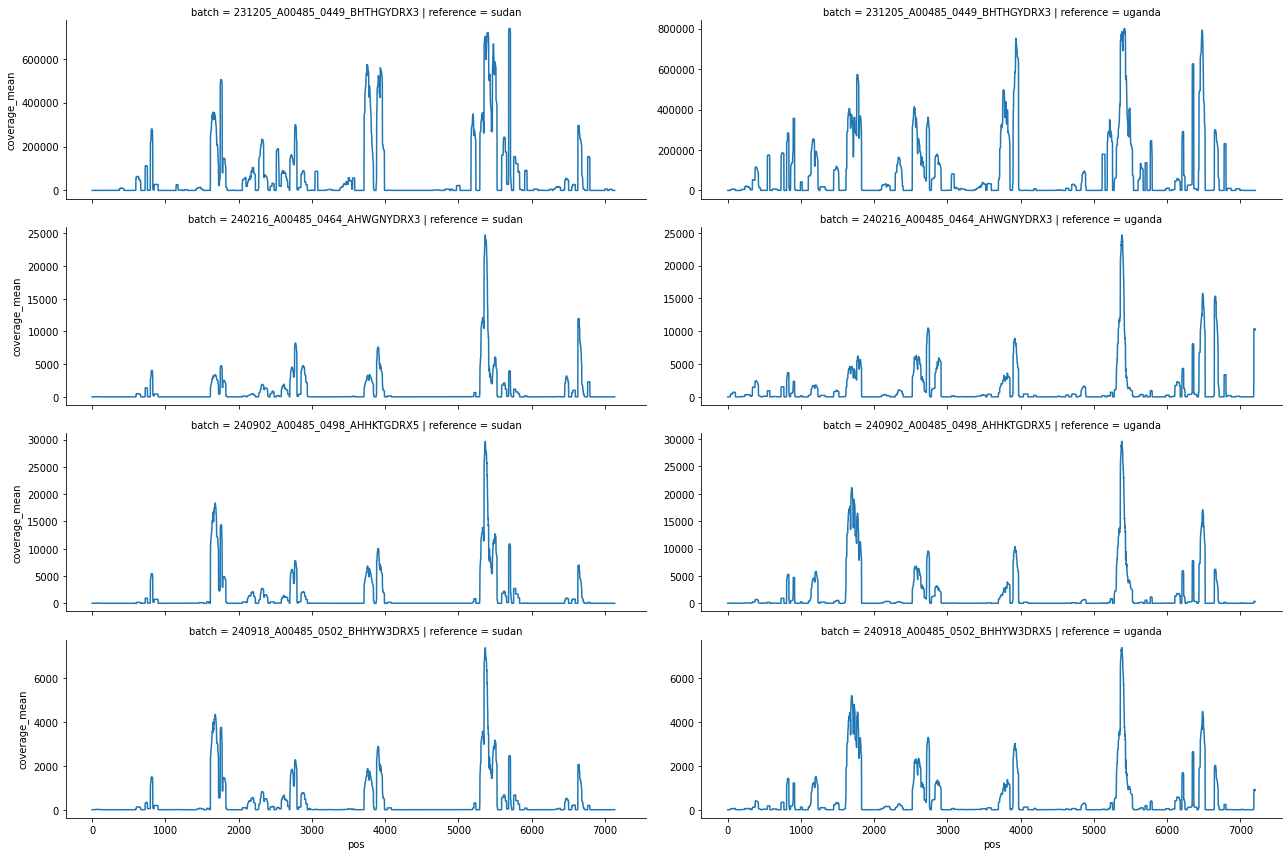

In [43]:
import seaborn as sns

g = sns.relplot(
    data=agg,
    kind="line",
    x="pos",
    y="coverage_mean",
    row="batch",
    col="reference",
    facet_kws={'sharey': False, 'sharex': True},
    aspect=3,         # Increases the width of each facet
    height=3          # (optional) height in inches
    
)
g.set_axis_labels("pos", "mean coverage")
g.set_titles("Batch: {row_name} | Ref: {col_name}")



/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Li

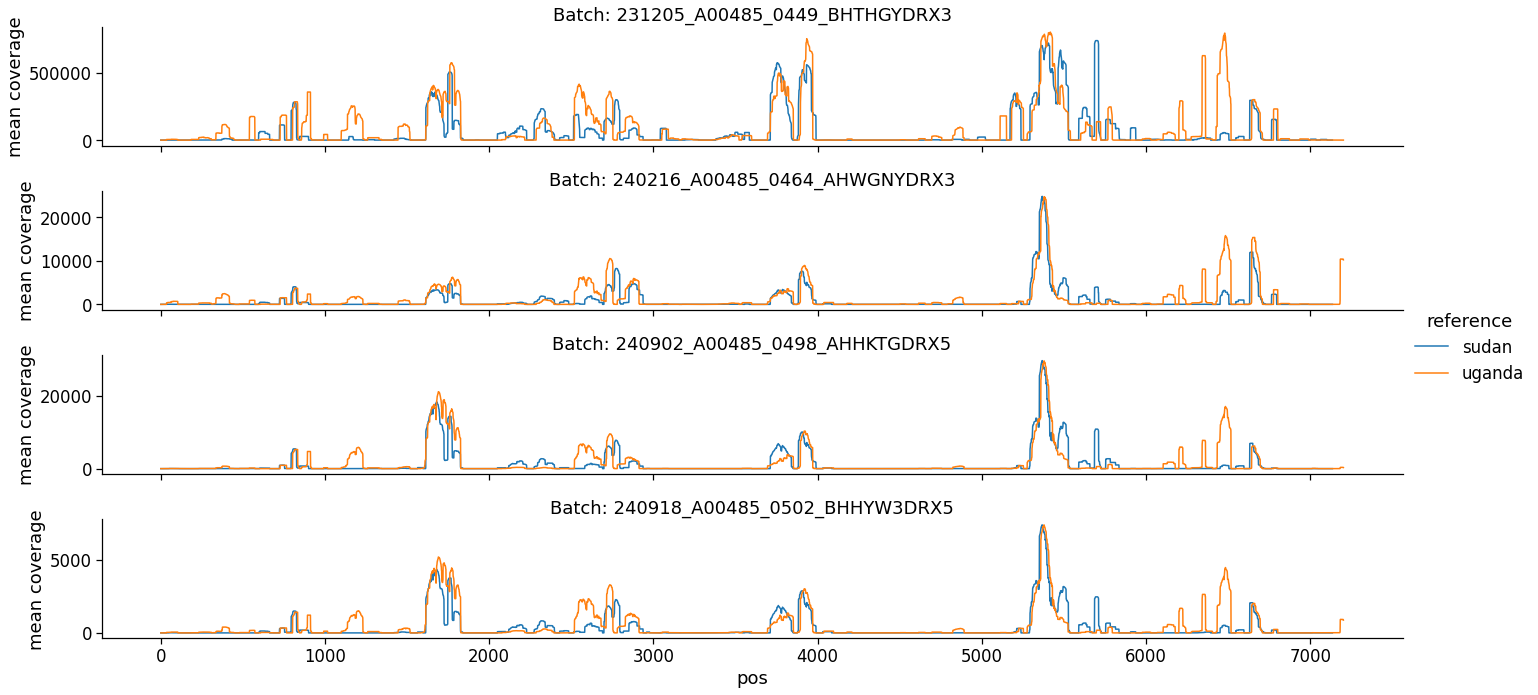

In [51]:
import seaborn as sns

sns.set_context("notebook", font_scale=1.5)

g = sns.relplot(
    data=agg,
    kind="line",
    x="pos",
    y="coverage_mean",
    row="batch",
    hue="reference",
    facet_kws={'sharey': False, 'sharex': True},
    aspect=8,         # Increases the width of each facet
    height=2.5          # (optional) height in inches
    
)
g.set_axis_labels("pos", "mean coverage")
g.set_titles("Batch: {row_name}")



/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lfuhrmann/Li

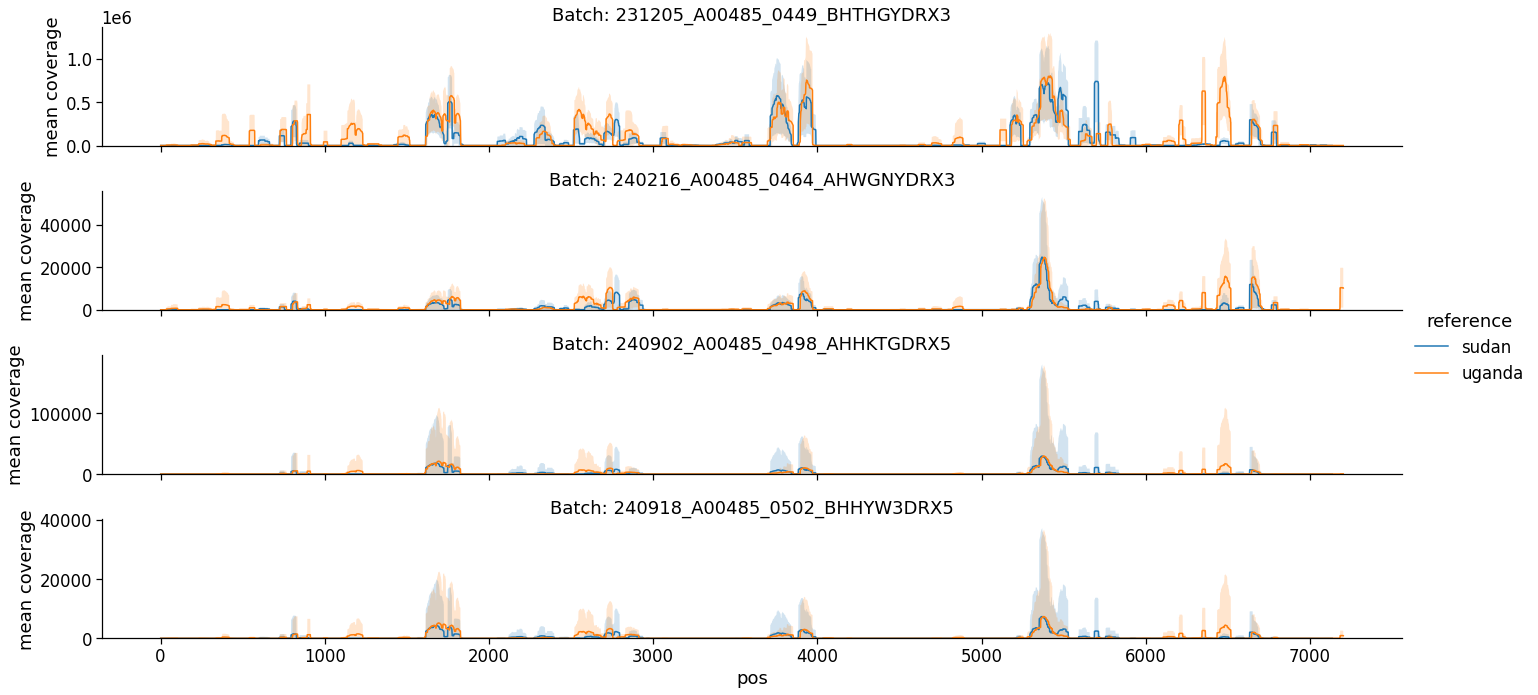

In [55]:
import seaborn as sns

sns.set_context("notebook", font_scale=1.5)

g = sns.relplot(
    data=agg,
    kind="line",
    x="pos",
    y="coverage_mean",
    row="batch",
    hue="reference",
    facet_kws={'sharey': False, 'sharex': True},
    aspect=8,
    height=2.5,
    errorbar=('sd', 1),  # --> does not work
    err_style='band'
)
g.set_axis_labels("pos", "mean coverage")
g.set_titles("Batch: {row_name}")

for ax, (batch, subdata) in zip(g.axes.flatten(), agg.groupby('batch')):
    for ref, subsub in subdata.groupby('reference'):
        ax.fill_between(
            subsub['pos'],
            subsub['coverage_mean'] - subsub['coverage_std'],
            subsub['coverage_mean'] + subsub['coverage_std'],
            alpha=0.2
        )
        
        
max_coverage = agg['coverage_mean'].max() + agg['coverage_std'].max()

for ax in g.axes.flatten():
    ax.set_ylim(0, )

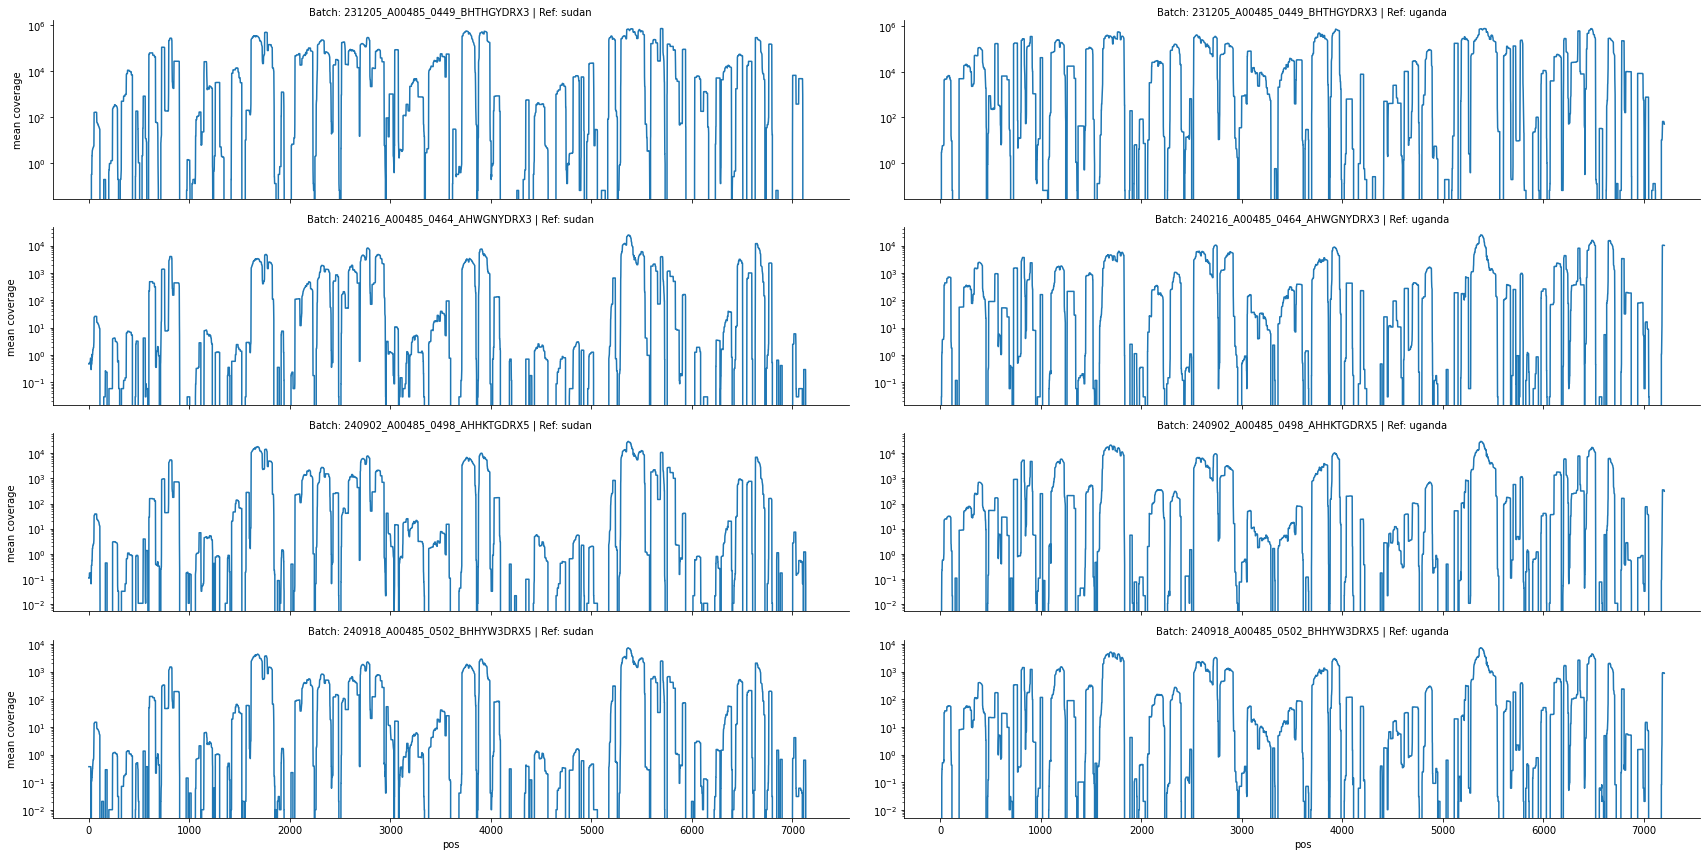

In [45]:
import seaborn as sns

gg = sns.relplot(
    data=agg,
    kind="line",
    x="pos",
    y="coverage_mean",
    row="batch",
    col="reference",
    facet_kws={'sharey': False, 'sharex': True},
    aspect=4,         # Increases the width of each facet
    height=3
)
gg.set_axis_labels("pos", "mean coverage")
gg.set_titles("Batch: {row_name} | Ref: {col_name}")

# Set y-axis to log scale for each facet
for ax in gg.axes.flatten():
    ax.set_yscale('log')
